In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import _tree
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [62]:
df['race'].value_counts()

White                 37572
Black                  4218
Asian-Pac-Islander     1373
Amer-Indian-Eskimo      421
Other                   373
Name: race, dtype: int64

In [6]:
df.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [18]:
print('\tIncome More Than $50K\n',
      '% of Total',(df['income_>50K'].sum()/len(df['income_>50K'])).round(2),'Count:', df['income_>50K'].sum(),
      '\n\n',
      '\tIncome Less Than $50K\n',
      '% of Total', ((len(df['income_>50K'])-df['income_>50K'].sum())/len(df['income_>50K'])).round(2),'Count:', len(df['income_>50K'])-df['income_>50K'].sum())

	Income More Than $50K
 % of Total 0.25 Count: 10092 

 	Income Less Than $50K
 % of Total 0.75 Count: 30635


In [4]:
def preprocess_data(df):
    X = pd.concat([np.log(df['age']),
                    pd.get_dummies(df['workclass']),
                    pd.Series(minmax_scale(df['fnlwgt']), name='fnlwgt'),
                    pd.get_dummies(df['education']),
                    pd.get_dummies(df['educational-num']),
                    pd.get_dummies(df['marital-status']),
                    pd.get_dummies(df['occupation']),
                    pd.get_dummies(df['relationship']),
                    pd.get_dummies(df['race']),
                    pd.get_dummies(df['gender']),
                    pd.Series(minmax_scale(df['capital-gain']), name='capital-gain'),
                    pd.Series(minmax_scale(df['capital-loss']), name='capital-loss'),
                    df['hours-per-week'],
                    pd.get_dummies(df['native-country'])], axis=1)
    y = pd.Series(df['income_>50K'], name='income_>50K')
    return X, y

In [5]:
X, y = preprocess_data(df)

In [12]:
clfA = RandomForestClassifier(n_estimators=100).fit(X, y)
y_pred = clfA.predict(X)
print(len(np.argwhere(y_pred==y.values))/len(y)) # accuracy
print(accuracy_score(y,y_pred))

0.9998635029688104
0.9998635029688104


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
clf50 = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
y_pred50 = clf50.predict(X_test)
print(len(np.argwhere(y_pred50==y_test.values))/len(y_test)) # accuracy
print(accuracy_score(y_test,y_pred50))

C:\Users\calm0378\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8519108280254777
0.8519108280254777


C:\Users\calm0378\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [27]:
cm = confusion_matrix(y_test, y_pred50)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6198  477]
 [ 825 1292]]


In [59]:
clf100 = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred100 = clf100.predict(X_test)
print(len(np.argwhere(y_pred100==y_test.values))/len(y_test)) # accuracy
print(accuracy_score(y_test,y_pred100))

C:\Users\calm0378\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8546405823475887
0.8546405823475887


C:\Users\calm0378\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [60]:
cm = confusion_matrix(y_test, y_pred100)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6205  470]
 [ 808 1309]]


In [29]:
print(classification_report(y_test, y_pred100))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6675
           1       0.74      0.62      0.67      2117

    accuracy                           0.85      8792
   macro avg       0.81      0.77      0.79      8792
weighted avg       0.85      0.85      0.85      8792



In [35]:
#Weight class: total observations / (number of classes * observations in class)
ltw_total = len(df['income_>50K'])-df['income_>50K'].sum()
mtw_total = df['income_>50K'].sum()
total_obs = len(df['income_>50K'])

lessthanweight = total_obs/(2*ltw_total)
morethanweight = total_obs/(2*mtw_total)

print('Less Than Wght:', lessthanweight.round(2),'\n','More Than Wght:', morethanweight.round(2))

Less Than Wght: 0.66 
 More Than Wght: 2.09


In [38]:
clf100W = RandomForestClassifier(n_estimators=100, class_weight={0:0.66,1:2.09}).fit(X_train, y_train)
y_pred100W = clf100W.predict(X_test)
print(len(np.argwhere(y_pred100W==y_test.values))/len(y_test)) # accuracy
print(accuracy_score(y_test,y_pred100W))

0.8510009099181074
0.8510009099181074


In [39]:
print(classification_report(y_test,y_pred100W))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6675
           1       0.73      0.60      0.66      2117

    accuracy                           0.85      8792
   macro avg       0.81      0.77      0.78      8792
weighted avg       0.84      0.85      0.85      8792



In [ ]:
names = ["clf50","clf100","clf100W","clf100W3","clf100W5","clf1000W3","clf1000W5"]
clfs = [
    RandomForestClassifier(n_estimators=50),
    RandomForestClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=100, class_weight={0:0.66,1:2.09}),
    RandomForestClassifier(n_estimators=100, max_depth=3, class_weight={0:0.66,1:2.09}),
    RandomForestClassifier(n_estimators=100, max_depth=5, class_weight={0:0.66,1:2.09}),
    RandomForestClassifier(n_estimators=1000, max_depth=3,class_weight={0:0.66,1:2.09}),
    RandomForestClassifier(n_estimators=1000, max_depth=5,class_weight={0:0.66,1:2.09}),
    ]

plt.figure(figsize=(30,24))
for name,clf in zip(names,clfs):

    clf.fit(X_train,y_train)
    y_proba = clf.predict_proba(X_test)[:,1]
    print("Roc AUC:"+name, roc_auc_score(y_test, clf.predict_proba(X_test)[:,1],average='macro'))
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [142]:
import itertools
from itertools import product
param_grid = {
    'n_estimators': [50, 100, 1000],
    'class_weight': [{0:0.66,1:2.09}, None],
    'max_depth': [3, 5, None]
}
# printing original dictionary
print("The original dictionary is : " + str(param_grid))

temp = list(param_grid.keys())
res = dict()
cnt = 0

# making key-value combinations using product
for combs in product(*param_grid.values()):

    # zip used to perform cross keys combinations.
    res[cnt] = [[ele, cnt] for ele, cnt in zip(param_grid, combs)]
    cnt += 1

# printing result
print("The computed combinations : " + str(res))



The original dictionary is : {'n_estimators': [50, 100, 1000], 'class_weight': [{0: 0.66, 1: 2.09}, None], 'max_depth': [3, 5, None]}
The computed combinations : {0: [['n_estimators', 50], ['class_weight', {0: 0.66, 1: 2.09}], ['max_depth', 3]], 1: [['n_estimators', 50], ['class_weight', {0: 0.66, 1: 2.09}], ['max_depth', 5]], 2: [['n_estimators', 50], ['class_weight', {0: 0.66, 1: 2.09}], ['max_depth', None]], 3: [['n_estimators', 50], ['class_weight', None], ['max_depth', 3]], 4: [['n_estimators', 50], ['class_weight', None], ['max_depth', 5]], 5: [['n_estimators', 50], ['class_weight', None], ['max_depth', None]], 6: [['n_estimators', 100], ['class_weight', {0: 0.66, 1: 2.09}], ['max_depth', 3]], 7: [['n_estimators', 100], ['class_weight', {0: 0.66, 1: 2.09}], ['max_depth', 5]], 8: [['n_estimators', 100], ['class_weight', {0: 0.66, 1: 2.09}], ['max_depth', None]], 9: [['n_estimators', 100], ['class_weight', None], ['max_depth', 3]], 10: [['n_estimators', 100], ['class_weight', None]

Tuning Hyper Parameters

In [44]:
from scipy.stats import randint
param_grid = {
    'n_estimators': [50, 100, 1000],
    'class_weight': [{0:0.66,1:2.09}, None],
    'max_depth': [3, 5, None]
}

In [45]:
random_cv = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = 3,random_state=420)
random_cv.fit(X_train,y_train)
print(random_cv.best_params_,"\n","Best Score:", random_cv.best_score_)

{'n_estimators': 100, 'max_depth': None, 'class_weight': {0: 0.66, 1: 2.09}} 
 Best Score: 0.8540025041348006


In [7]:
random_fr = RandomForestClassifier(n_estimators=100,class_weight={0: 0.66, 1: 2.09},random_state=420).fit(X_train,y_train)
y_rand_pred = random_fr.predict(X_test)
print(classification_report(y_test,y_rand_pred))


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6675
           1       0.73      0.61      0.67      2117

    accuracy                           0.85      8792
   macro avg       0.81      0.77      0.79      8792
weighted avg       0.85      0.85      0.85      8792



<AxesSubplot:>

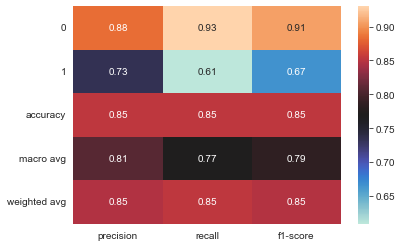

In [19]:
rf_report = classification_report(y_test,y_rand_pred,output_dict=True)
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True, cmap='icefire')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Roc AUC: 0.9012827140377788


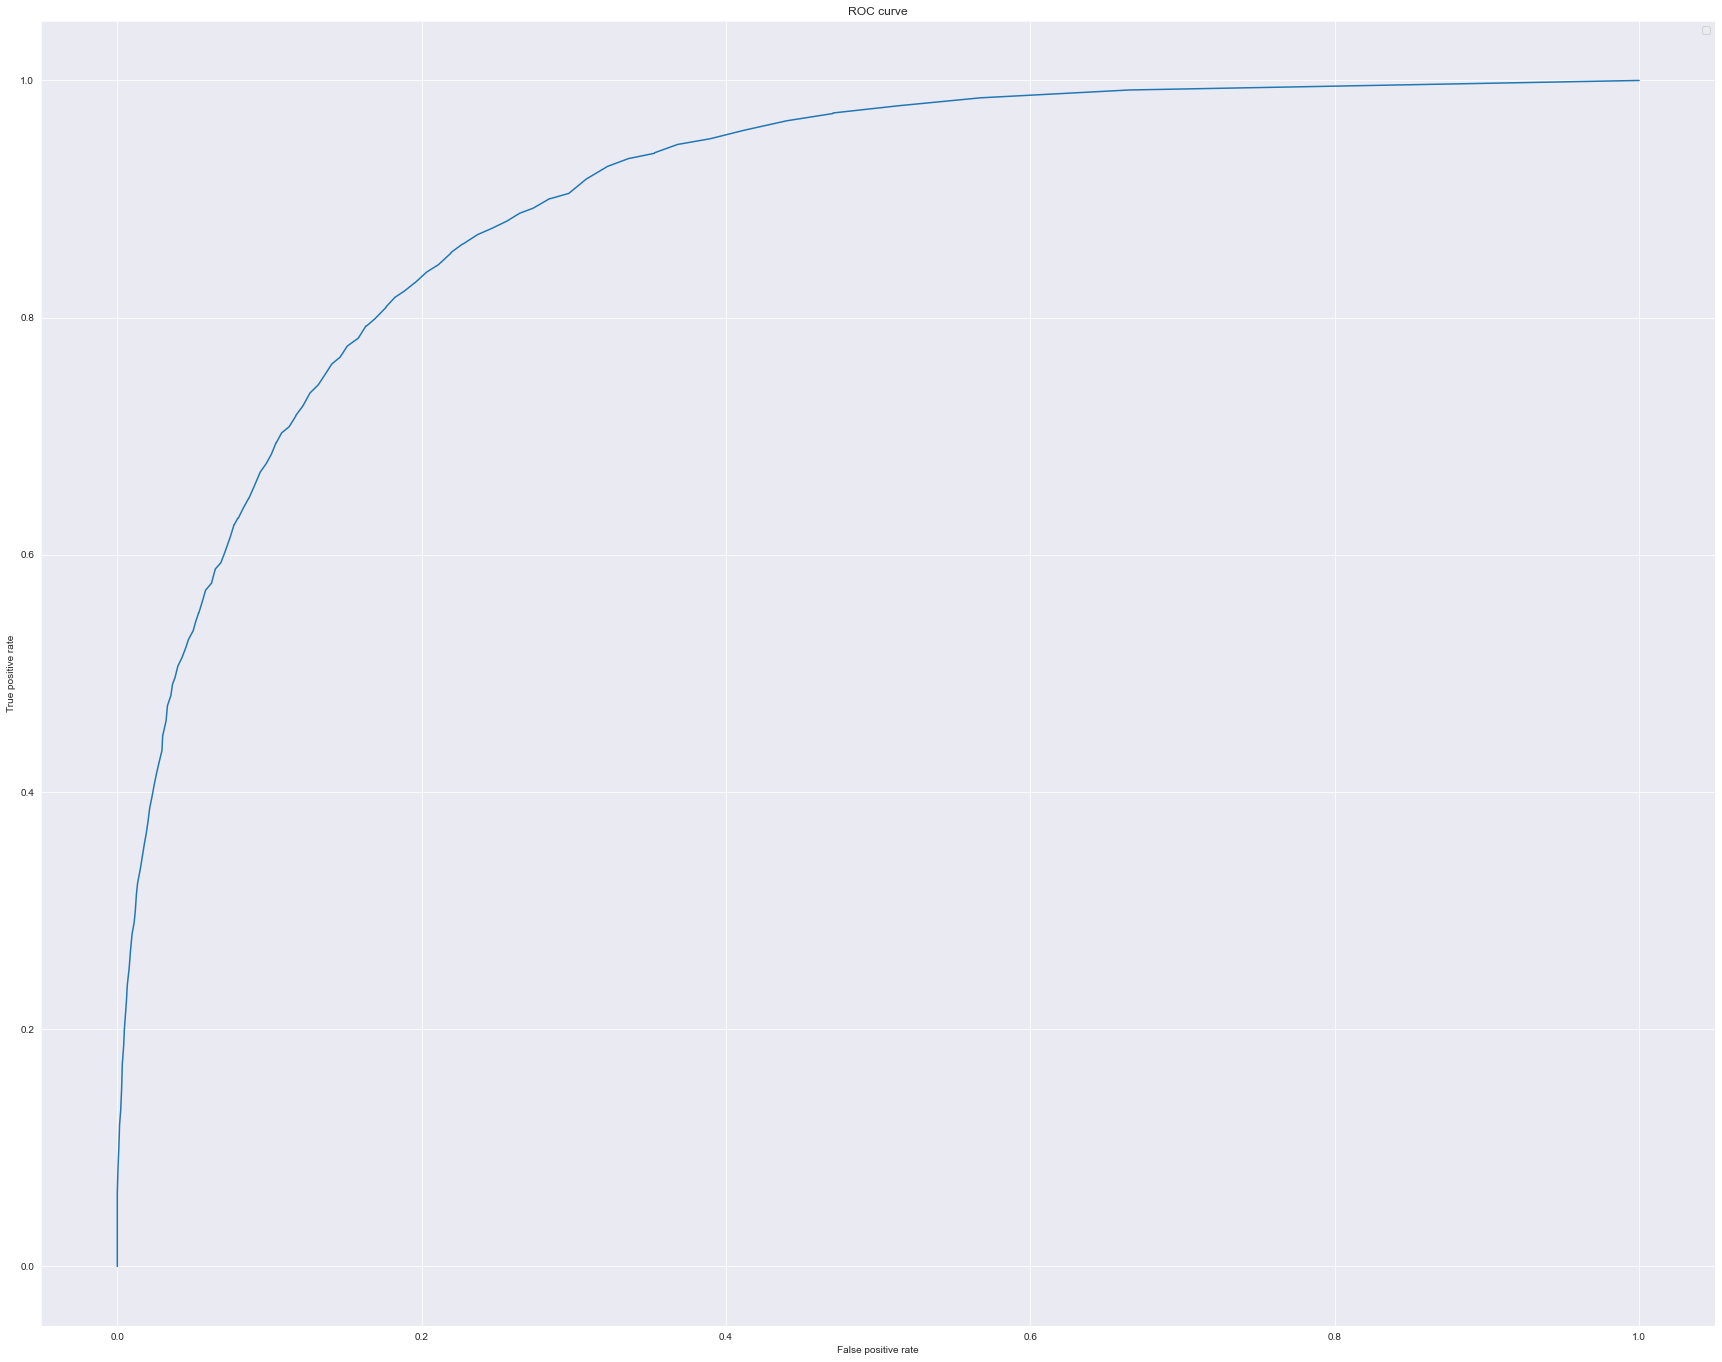

In [38]:
plt.figure(figsize=(30,24))
random_fr.fit(X_train,y_train)
y_proba = random_fr.predict_proba(X_test)[:,1]
print("Roc AUC:", roc_auc_score(y_test, random_fr.predict_proba(X_test)[:,1],average='macro'))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [18]:
tn,fp,fn,tp = confusion_matrix(y_test, y_rand_pred).ravel()
print('Confusion matrix\n\n', tn,fp,fn,tp)
tpr_recall = tp/(tp+fn)
tpr_recall
tnr = tn/(tn+fp)
tnr
fnr= fn/(fn+tp)
fnr
fpr= fp/(fp+tn)
fpr

Confusion matrix

 6207 468 828 1289


0.0701123595505618

In [40]:
Random_fr_accu_score = []
for _ in range(1000):
    random_fr = RandomForestClassifier(n_estimators=100,class_weight={0: 0.66, 1: 2.09}).fit(X_train,y_train)
    pred = random_fr.predict(X_test)
    Random_fr_accu_score.append(accuracy_score(y_test,pred))

In [ ]:
med_acu_score = np.median(Random_fr_accu_score)
avg_acu_score = np.mean(Random_fr_accu_score)
print(avg_acu_score,med_acu_score)

In [49]:
Random_fr_accu_score = pd.Series(Random_fr_accu_score)
Random_fr_accu_score.to_csv('RF100W_Accu_Score.csv', index=False)

In [14]:
cm = confusion_matrix(y_test, y_rand_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6207  468]
 [ 828 1289]]


<AxesSubplot:>

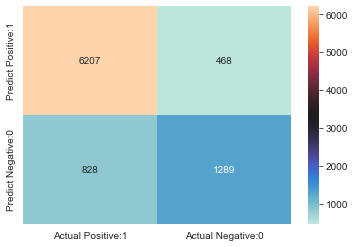

In [15]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='icefire')

In [19]:
estimator = random_fr.estimators_
estimator

[DecisionTreeClassifier(max_features='auto', random_state=1355688881),
 DecisionTreeClassifier(max_features='auto', random_state=36893768),
 DecisionTreeClassifier(max_features='auto', random_state=1945751942),
 DecisionTreeClassifier(max_features='auto', random_state=689590847),
 DecisionTreeClassifier(max_features='auto', random_state=1146680095),
 DecisionTreeClassifier(max_features='auto', random_state=1613220467),
 DecisionTreeClassifier(max_features='auto', random_state=467842990),
 DecisionTreeClassifier(max_features='auto', random_state=464520377),
 DecisionTreeClassifier(max_features='auto', random_state=1581263002),
 DecisionTreeClassifier(max_features='auto', random_state=1612513546),
 DecisionTreeClassifier(max_features='auto', random_state=557179720),
 DecisionTreeClassifier(max_features='auto', random_state=1801932414),
 DecisionTreeClassifier(max_features='auto', random_state=1514056343),
 DecisionTreeClassifier(max_features='auto', random_state=232605326),
 DecisionTree

In [67]:
n_estimator = 100

estimatorAccuracy=[]
for curEstimator in range(n_estimator):
    estimatorAccuracy.append([curEstimator,accuracy_score(y_test, random_fr.estimators_[curEstimator].predict(X_test))])

estimatorAccuracy=pd.DataFrame(estimatorAccuracy,columns=['estimatorNumber','Accuracy'])
estimatorAccuracy.sort_values(inplace=True,by='Accuracy',ascending=False)

bestDecisionTree= random_fr.estimators_[estimatorAccuracy.head(1)['estimatorNumber'].values[0]]

In [68]:
bestDecisionTree

DecisionTreeClassifier(max_features='auto', random_state=1557225839)

In [73]:
bestTree_pred = random_fr.estimators_[45].predict(X_test)

In [76]:
cm = confusion_matrix(y_test, bestTree_pred)
bestTree_AccSc = accuracy_score(y_test,bestTree_pred)
print('Accuracy Score =', bestTree_AccSc,'\n\n','Confusion matrix\n\n', cm)

Accuracy Score = 0.8176751592356688 

 Confusion matrix

 [[5887  788]
 [ 815 1302]]


In [72]:
estimatorAccuracy.head()['Accuracy']

45    0.817675
11    0.817220
61    0.816538
4     0.815969
2     0.814718
Name: Accuracy, dtype: float64

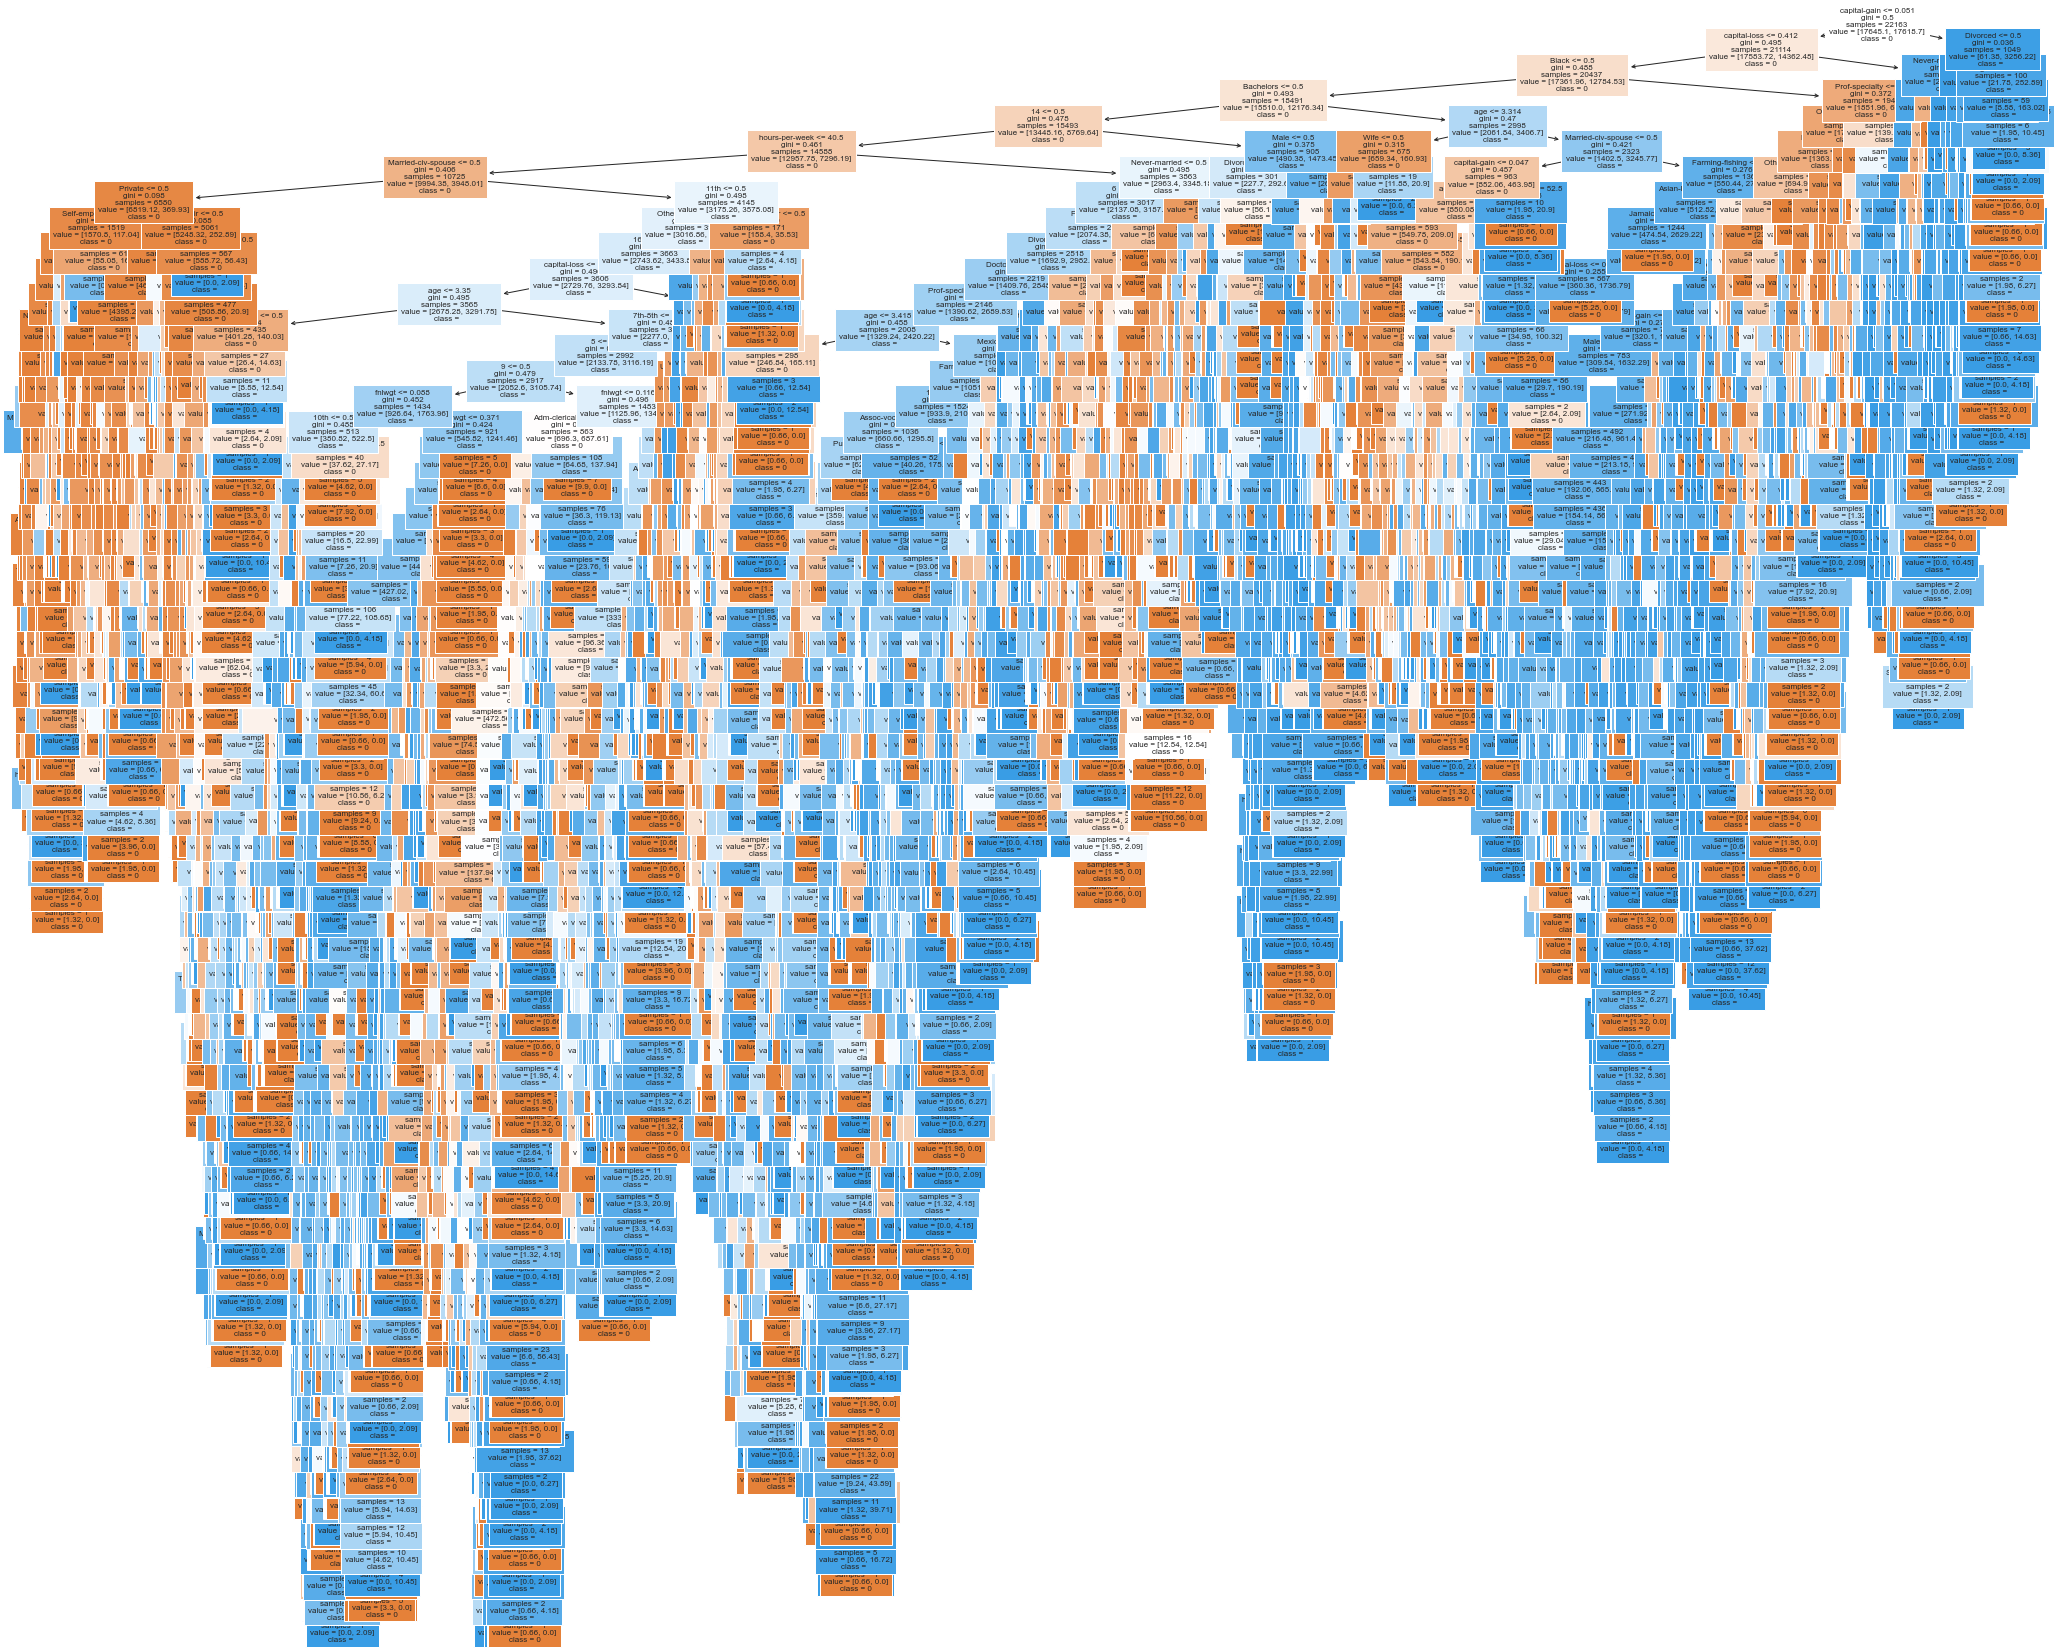

In [46]:
class_names = ['income_<50K', 'income_>50K']
plt.figure(figsize=(35,30))
_ = tree.plot_tree(bestDecisionTree, feature_names=X_train.columns, class_names=class_names, fontsize=8, filled=True)
plt.show()

In [84]:
bestRFdt_ftScores = pd.Series(bestDecisionTree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
bestRFdt_ftScores

fnlwgt                0.138327
age                   0.137242
Married-civ-spouse    0.120986
capital-gain          0.110065
hours-per-week        0.093765
                        ...   
1                     0.000000
Hungary               0.000000
Honduras              0.000000
Haiti                 0.000000
Holand-Netherlands    0.000000
Length: 120, dtype: float64

In [78]:
bestDecisionTree.tree_.node_count

13217

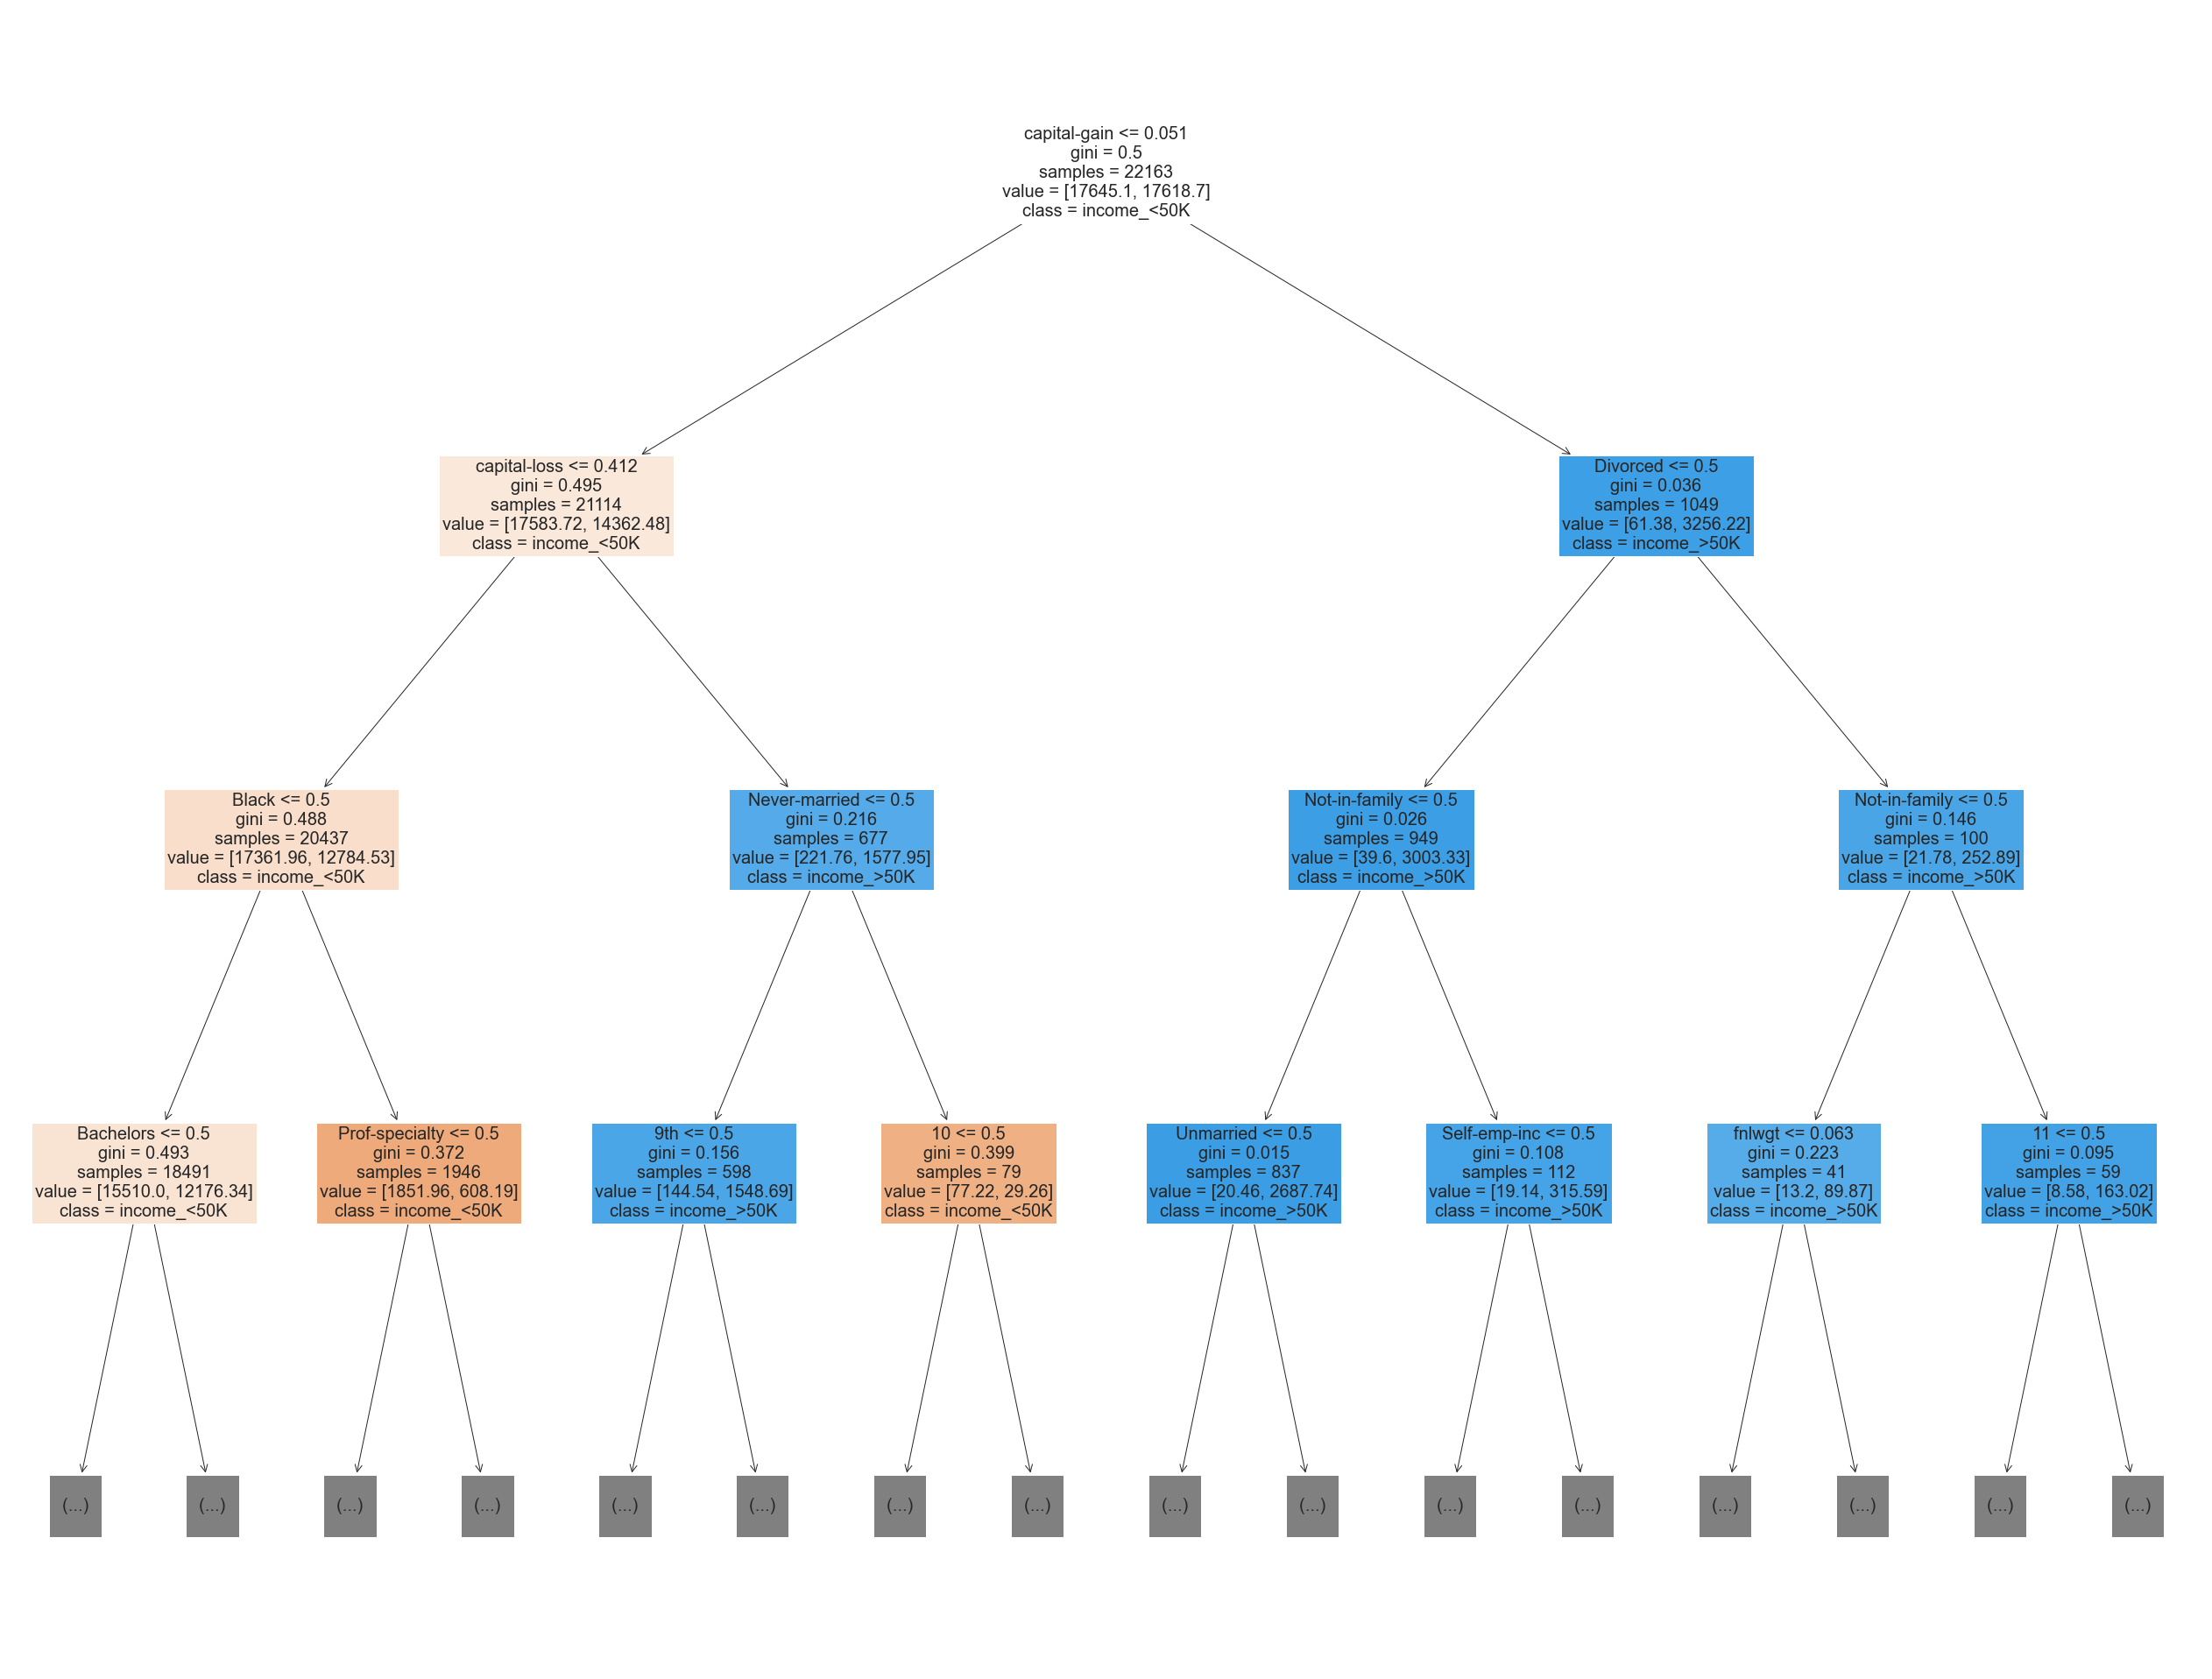

In [57]:
plt.figure(figsize=(45,35))
_b = tree.plot_tree(bestDecisionTree, feature_names=X_train.columns, class_names=class_names, fontsize=20, filled=True, max_depth=3)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.kdeplot(Random_fr_accu_score)
ax = plt.hist(Random_fr_accu_score, bins=10, density=True)
plt.ylabel(ylabel="Density",size=30)
plt.xlabel(xlabel="Accuracy Score",size=30)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.locator_params(axis='x',nbins=10)
plt.show()

In [ ]:
# error = abs(y_pred100W-y_test)
# MAE = np.median(error)
# MAPE = 100*(error/y_test)
# print(MAE)

In [82]:
feature_scores = pd.Series(random_fr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
ylabels=feature_scores.index
xlabels=feature_scores.values

In [67]:
feature_scores.to_csv('RF100W_Feature_Scores.csv')
feature_scores

age                           0.159093
fnlwgt                        0.141044
hours-per-week                0.082110
Married-civ-spouse            0.080340
capital-gain                  0.067719
                                ...   
Armed-Forces                  0.000046
Outlying-US(Guam-USVI-etc)    0.000039
Honduras                      0.000028
Never-worked                  0.000007
Holand-Netherlands            0.000000
Length: 120, dtype: float64

In [63]:
xticks = np.array(feature_scores)

AxisError: axis 1 is out of bounds for array of dimension 1

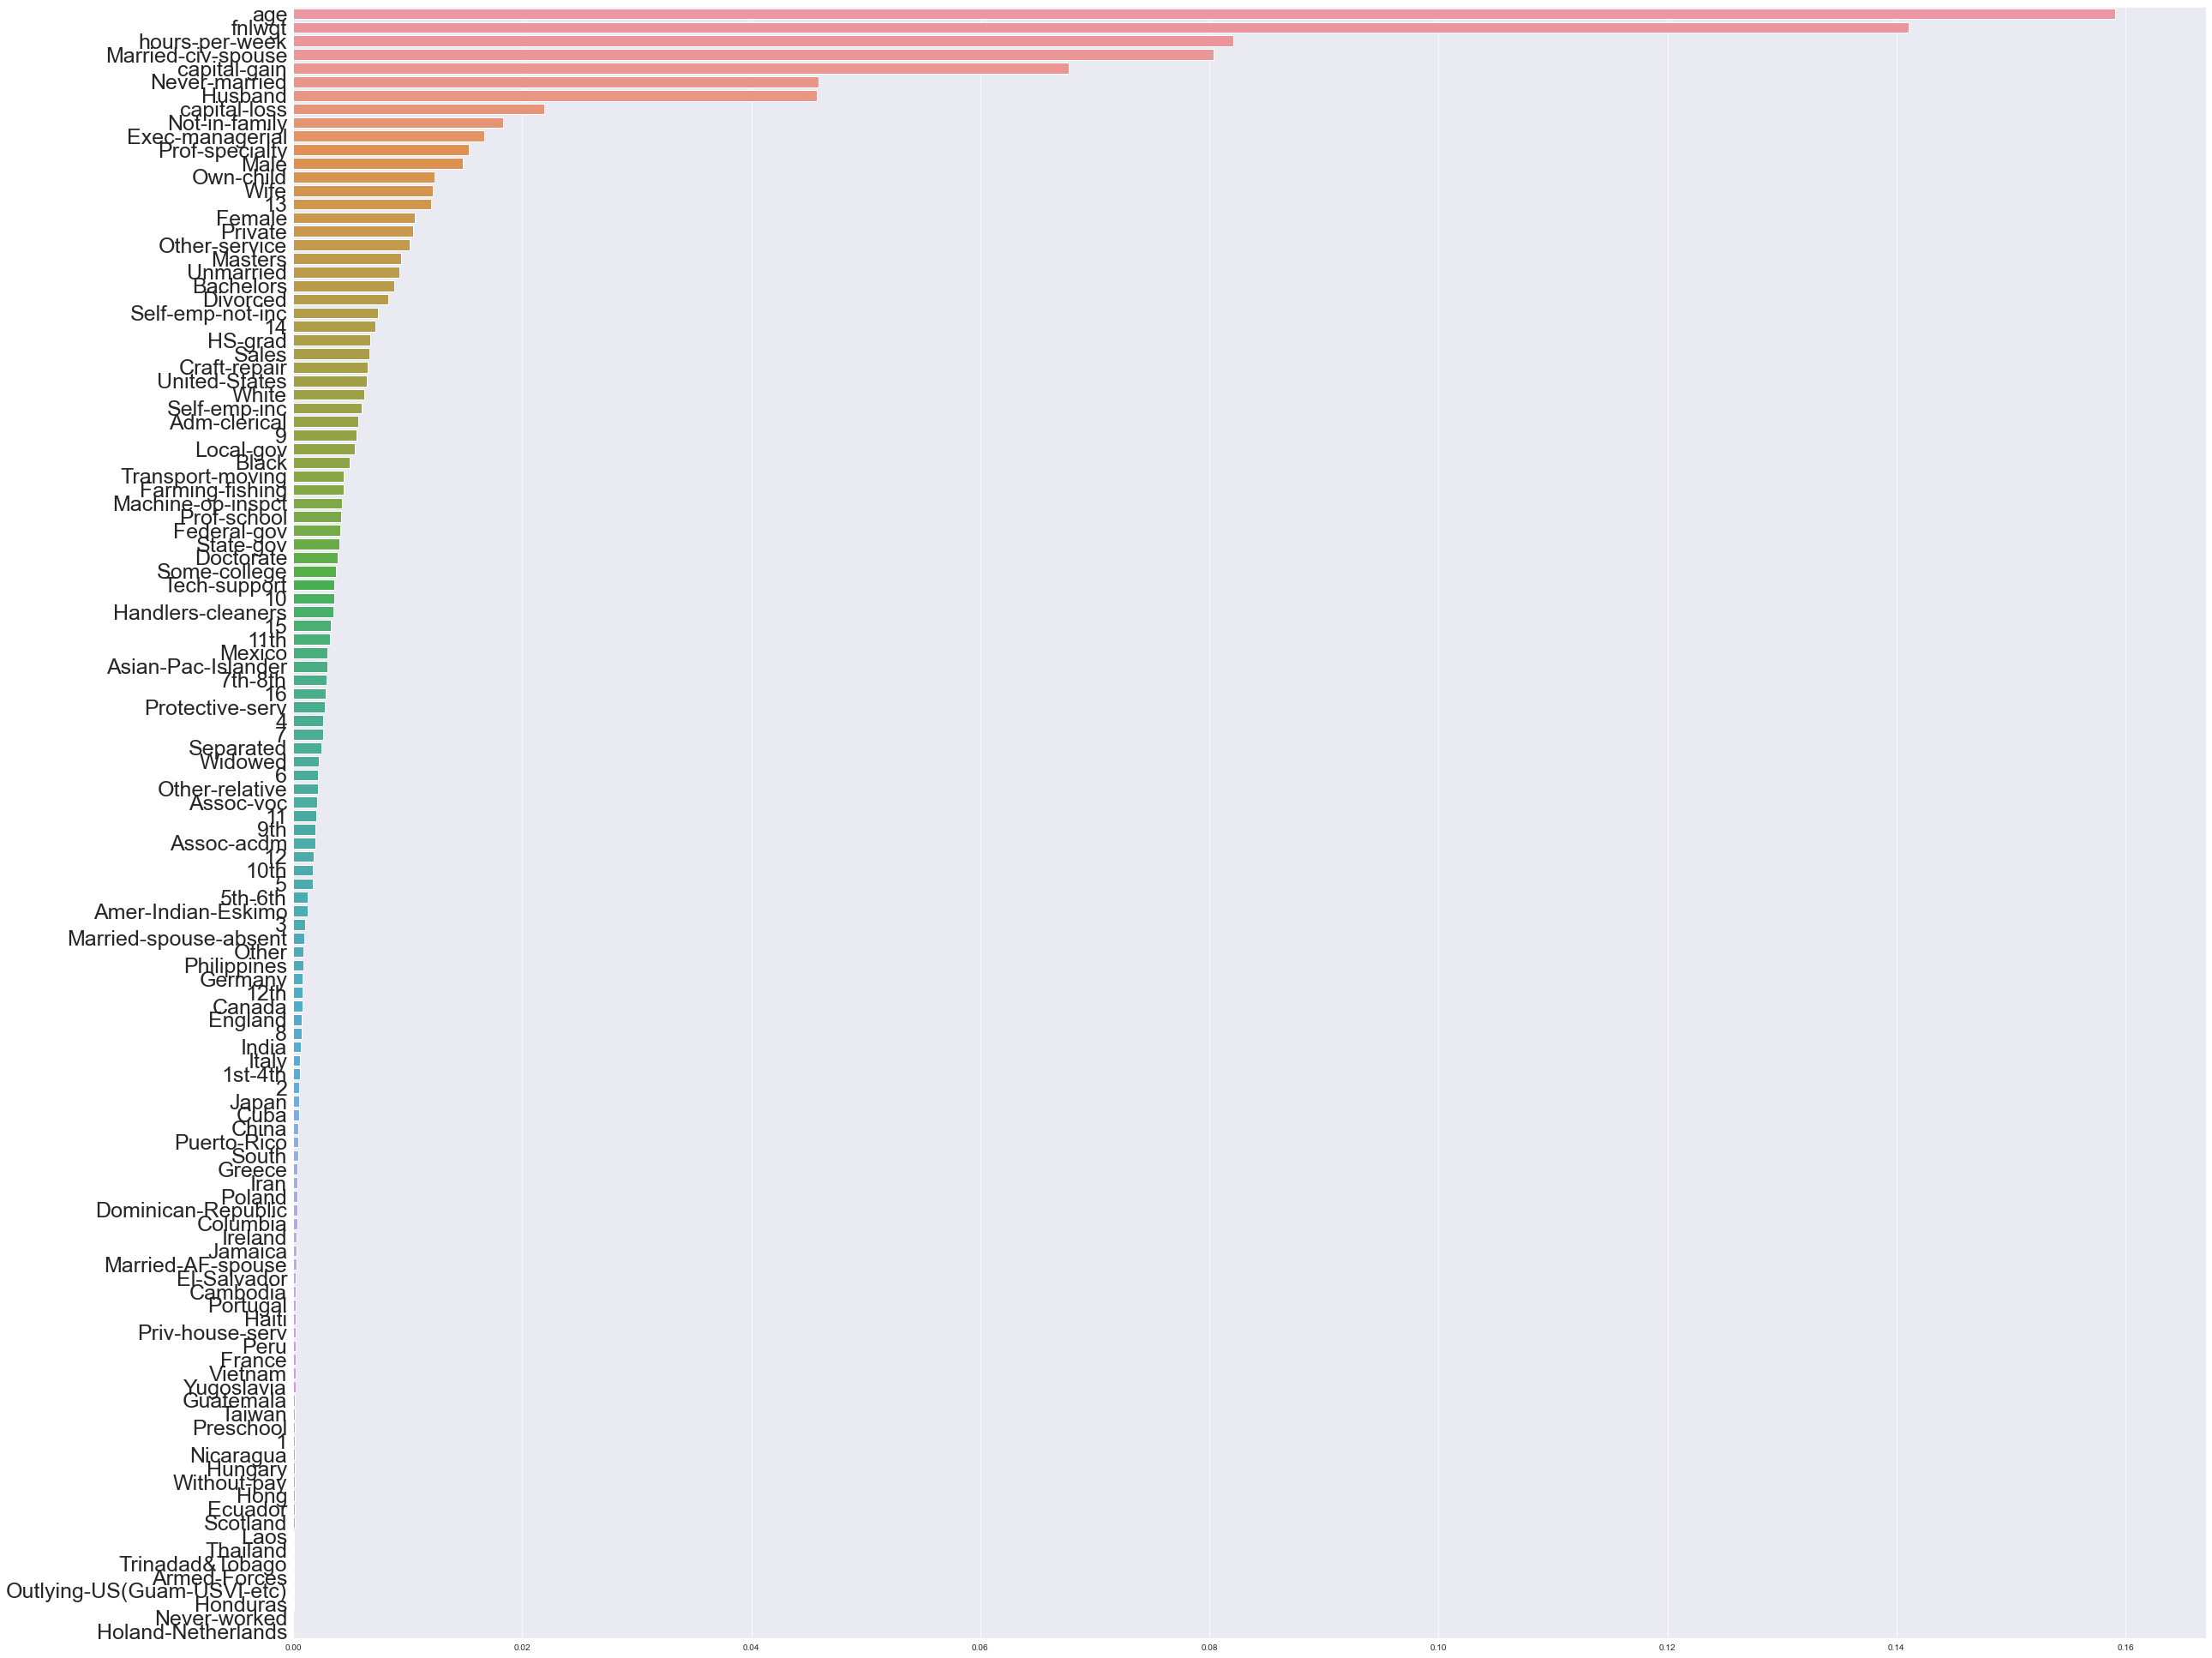

In [64]:
f, ax = plt.subplots(figsize=(40, 35))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_yticklabels(feature_scores.index, size=25)
ax.set_xticklabels(np.flip(xticks,axis=1).round(2), size=25)
plt.show()